# Customer Analysis

---

## Introduction
Customer analysis helps a business understand its customer base and tailor its products and marketing strategies to better serve its target customers. By analyzing customer data, a company can identify patterns, trends, and preferences that can inform product development and marketing efforts.

---

## Project Goals
The aims of this project are to:

- Identify customer segments to help tailor marketing campaigns and product offerings effectively.
- Determine key customer characteristics that significantly impact purchasing behavior.
- Provide actionable insights and recommendations for targeting specific customer segments and improving overall sales and revenue.

---

## Project Conclusions and Findings

The following insights were gained from our analysis:

- High-income customers: highest spending, targeted with exclusive and expensive products to increase sales and revenue.
- Catalog sales channel: highest spending and response rate, invest more to reach more customers and generate sales.
- Encourage customer participation in campaigns: leads to higher spending and purchase values.
- One-person households: highest spending and response rate, offer tailored products and services for increased sales and satisfaction.

For a full conclusion look at section 4 of the project.

---

## Project Contents
This project consists of:

**Exploratory Data Analysis (EDA):**
Summary statistics, distribution analysis, and investigation of relationships between variables.

**Customer Segmentation:**
Grouping customers based on demographic information and analyzing differences in purchasing behavior across groups.

**Data Visualization:**
Using Matplotlib & Seaborn to create informative and visually appealing charts and plots.

**Recommendations:**
Providing marketing and product development suggestions based on the analysis of customer segments and their preferences.

---

## Data Source
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
(The dataset has 2240 rows and 29 columns)

---

## Limitations
- The dataset only includes information about customers who have already engaged with the company, potentially leading to sampling bias and limiting the generalizability of the findings to the wider population.
- Missing data in the income column was imputed based on the mean income of customers with similar characteristics, potentially introducing bias in the analysis.
- Outliers were removed from the data, potentially leading to a loss of information and limiting the accuracy of the analysis.
- The analysis assumes that customer behavior is primarily driven by demographic information, potentially overlooking other important factors that impact purchasing decisions.
- The analysis does not take into account external factors, such as economic or social trends, which may influence customer behavior and impact the validity of the findings.

# 1. Examining The Data

In this section we will have an initial look at the dataset to get more familiar with the data. First let's start by commenting on what each column represents.

## Columns Split into 4 categories

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [180]:
# Data manipulation 
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Loading and Examining the Dataset

In [181]:
# Loading the data
data = pd.read_csv('data/customer_data.csv', sep='\t')

# Dropping irrelevant columns (had same value for each row or unique identifier)
data.drop(['Z_CostContact','Z_Revenue', 'ID'], axis=1, inplace=True)

In [182]:
# Checking for duplicates
num_original_rows = data.shape[0]
data = data.drop_duplicates()
print(f'{num_original_rows-data.shape[0]} duplicate rows were dropped from the dataset')
print('-'*80)

# Looking at the first 5 rows of the data and checking its shape
pd.set_option('display.max_columns', None)
print(f'The dataset has shape: {data.shape}')
print('-'*80)
display(data.head())
print('-'*80)

# Seeing more information about the dataset
display(data.info())

182 duplicate rows were dropped from the dataset
--------------------------------------------------------------------------------
The dataset has shape: (2058, 26)
--------------------------------------------------------------------------------


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2058 non-null   int64  
 1   Education            2058 non-null   object 
 2   Marital_Status       2058 non-null   object 
 3   Income               2034 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Dt_Customer          2058 non-null   object 
 7   Recency              2058 non-null   int64  
 8   MntWines             2058 non-null   int64  
 9   MntFruits            2058 non-null   int64  
 10  MntMeatProducts      2058 non-null   int64  
 11  MntFishProducts      2058 non-null   int64  
 12  MntSweetProducts     2058 non-null   int64  
 13  MntGoldProds         2058 non-null   int64  
 14  NumDeal

None

**Observations:**
- The income column has some missing data
- Lots of the boolean data is already encoded (the columns which refer to whether customers accepted promotional offers or complained etc)
- `Dt_Customer` should be in datetime format

In [183]:
# Changing the datatype of the `Dt_Customer` column to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [184]:
# A statistical summary of the data
data.describe(include='all', datetime_is_numeric=True)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2058.000000,2058,2058,2034.000000,2058.000000,2058.000000,2058,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
unique,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1030,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.787172,NaN,NaN,52357.791544,0.445578,0.509232,2013-07-11 12:50:22.740524800,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,0.152089
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35528.250000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51533.000000,0.000000,0.000000,2013-07-12 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,68480.750000,1.000000,1.000000,2014-01-01 00:00:00,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations**:
- The oldest customer appears to have d.o.b in year 1893, should check this.
- The mean house hold income is 52,357.
- The mean amount spent per customer is the highest for wines with a value of 303, the lowest is fruits with a value of 26.
- The most common method for making a purchase is in store, followed by the web then by the catalogue. 
- less than 1 percent of customers filed a compain in the last two years.
- 15% of customers joined the last promotion, which is the highest join rate out of all the promotions.

## 1.2 Dealing with Missing Values

The `Income` column is the only column that is missing values. We will investigate to find a reasonable way to impute the missing data.

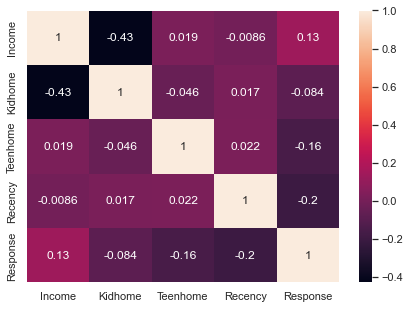

In [185]:
# Defining relevant columns to find correlations with `Income`
cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'Response'
]

correlations = data[cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlations, annot=True)
plt.show()

From the heatmap above, it seems reasonable to use the `Kidhome` feature to impute the missing data for the `Income` column. Also intuitively it makes sense to group the data by `Education`. Lets combine these two features to see if it looks reasonble to impute missing data for `Income` based on them.

In [186]:
# Grouping the data by the relevant columns and rotating the DataFrame
grouped = data[['Income', 'Education', 'Kidhome']].groupby(['Education', 'Kidhome']).mean()

# Apply some styling to the DataFrame to make it more informative
styled_grouped = grouped.style.background_gradient(cmap='Blues').format('{:.2f}')

# Display the styled and rotated DataFrame
display(styled_grouped)


This looks like a good way to impute the missing values as we see that the mean income differs by education level and predictably decreases as there are more kids in the household.

In [187]:
# Imputing the missing data
data["Income"] = data["Income"].fillna(data.groupby(['Education','Kidhome'])["Income"].transform('mean'))

# Printing the number of missing values in the dataset
num_mis = data.isna().sum().sum()
print(f'There are {num_mis} missing values in the dataset')

There are 0 missing values in the dataset


## 1.3 Dealing With Outliers

In a customer segmentation task we want to find the commonalities between different customers so that we can target these groups in some way. Outliers, therefore, are completely irrelevant to our task and only add noise. 

### 1.3.1 Numerical Outliers
Let's use boxplots to work out which features contain outliers and remove the outliers from the dataset.

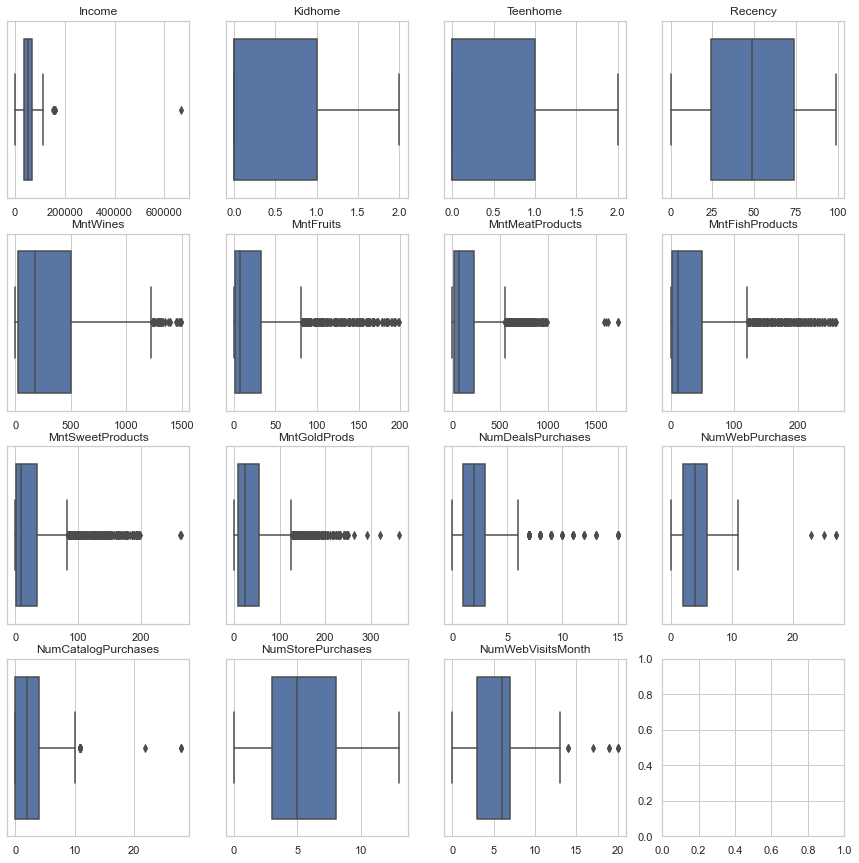

In [188]:
# Plotting boxplots

# Defining numerical columns that could contain outliers
num_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

# create a figure with subplots for each box plot
fig, axs = plt.subplots(4, 4, figsize=(15,15))

# loop through each column and create a box plot
for i in range(len(num_cols)):
    row = i // 4  # calculate the row index
    col = i % 4   # calculate the column index
    sns.boxplot(x=data[num_cols[i]], ax=axs[row][col])
    axs[row][col].set_title(num_cols[i])
    axs[row][col].set_xlabel('')

plt.show()


**Observations:**
- We can see that some columns do contain outliers. For example the `Income` column as well as columns related to customer spending over different categories as well as columns related to the method customers used to purchase items.



Columns with outliers will be filtered using the interquartile range but the columns that refer to customer spending will be left untouched. This is because there appears to be a large number of outliers in this category and because these customers are clearly willing to spend a lot of money. Therefore, it may be a good idea to leave these outliers in the dataset and see if they form a customer clusters of high-spending customers.

In [189]:
# Defining a list of columns that contain relevant outliers
cols_outliers = [
    'Income', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth'
]

# Check if rows containing outlier in one column contain outlier values in other columns
outliers_mask = pd.DataFrame(False, index=data.index, columns=cols_outliers)
for col in cols_outliers:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers_mask[col] = (data[col] < lower_bound) | (data[col] > upper_bound)
    
# Creating a frequency tables for rows with number of outliers    
outliers_per_row = outliers_mask.sum(axis=1)
outliers_freq = outliers_per_row.value_counts().sort_index()

print("Outlier Frequency Distribution:")
print(outliers_freq)


Outlier Frequency Distribution:
0    1948
1     102
2       6
3       2
dtype: int64


This frequency distribution shows that number of outliers in a single row. We can see that the vast majority of rows contain no oultiers (1948) and that very few rows contain more than 1 outlier (8). Remember, that this is not including the columns related to customer spending.

In [190]:
# Defining a function to remove outliers based on the inter-quartile range
def remove_outliers(data, columns):
    data_filtered = data.copy()
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]
    return data_filtered

# Creating the filtered dataset with relevant outliers removed
data_filtered = remove_outliers(data, columns=cols_outliers) 

### 1.3.2 Categorical Outliers

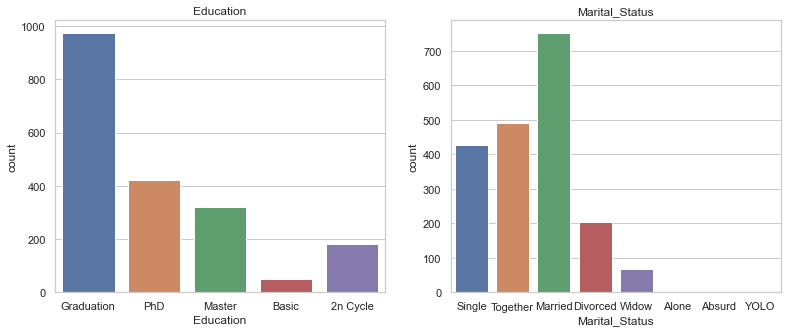

In [191]:
# Plotting barcharts for categorical columns
cat_cols = ['Education', 'Marital_Status']

# create a figure with subplots for each bar chart
fig, axs = plt.subplots(1, 2, figsize=(13,5))

# loop through each column and create a bar chart
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=data_filtered, ax=axs[i])
    axs[i].set_title(col)

plt.show()


**Observations:**
- Can see that the least common education type is basic (no further education)
- 2n Cycle refers to graduate or masters level studies
- The `Marital_Status` column contains outliers that are clearly not serious answers. These rows can be removed from the dataset.

In [192]:
# drop rows where the 'column_name' column contains any of the strings in the list 'specific_strings'
specific_strings = ['Alone', 'Absurd', 'YOLO']
data_filtered = data_filtered[~data_filtered['Marital_Status'].isin(specific_strings)]

### 1.3.3 Date Outliers

When exploring the dataset it was seen that the lowest value for year of birth was 1893. Let's investigate this further.

In [193]:
# Selecting rows that have a year of birth for the customers less than the year 1940
data_filtered[data_filtered['Year_Birth'] < 1940]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


For these three rows it appears that an error was made at some point in the `Year_Birth` column. We will impute the data from these three rows to have the mean year of birth, so that we don't lose the rest of their data.

In [194]:
# Compute the mean values by Kidhome and Teenhome
mean_values = data_filtered[['Year_Birth','Kidhome', 'Teenhome']].groupby(['Kidhome','Teenhome']).mean()

# Select rows with Year_Birth less than 1940
mask = data_filtered['Year_Birth'] < 1940
rows_to_impute = data_filtered[mask]

# Impute Year_Birth with mean values
for index, row in rows_to_impute.iterrows():
    kidhome = row['Kidhome']
    teenhome = row['Teenhome']
    mean_year_birth = mean_values.loc[(kidhome, teenhome), 'Year_Birth']
    data_filtered.loc[index, 'Year_Birth'] = mean_year_birth

## 1.4 Adding New Columns

Before moving on to the EDA, I think that some extra columns could be created to get a better idea of the behaviours of the customers. We can then explore these new columns in the EDA.

Columns to add:
- `TotSpend`: Total amount spent (a simple metric to evaluate a customers total spend)
- `TotPurchases`: Total number of purchases accross catalogue, website or in store purchases.
- `Tothome`: Total number of people in the household (helps us characterise different customers and understand their spending habits)
- `IncomePerPerson`: Household income per person in the household (Rather than just looking at income, this helps us understand whether a customer has lots of money to spend, or if the household income is spread over lots of people)


The new `Tothome` column is imprecise as we are assuming that if the marital status is 'Together' and there are kids in the household, then the couple live together. However if the status is 'Together' but there are no kids or teenagers than we are assuming that they do not live together. Therefore also the `IncomePerPerson` column is imprecise to. We are using the data in our dataset to estimate how many people live in someone's household and therefore how their income is 'spread' over multiple people. However we don't have information for lots of possible financial dependencies that customers might or might not have. For example customers could financially support their parents (or the other way round) etc. Despite these limitations, we can see if the metrics appear to add value to our project.

In [195]:
# Creating the `TotSpend` column
data_filtered['TotSpend'] = data_filtered[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Creating the `TotPurchases` column
data_filtered['TotPurchases'] = data_filtered[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Creating the `Tothome` column, using np.where for efficiency
data_filtered['Tothome'] = 1 + data_filtered[['Kidhome', 'Teenhome']].sum(axis=1)
data_filtered['Tothome'] = np.where((data_filtered['Marital_Status'] == 'Married'), data_filtered['Tothome'] + 1, data_filtered['Tothome'])
data_filtered['Tothome'] = np.where((data_filtered['Marital_Status'] == 'Together') & ((data_filtered['Kidhome'] > 0) | (data_filtered['Teenhome'] > 0)), data_filtered['Tothome'] + 1, data_filtered['Tothome'])

# Creating the `IncomePerPerson` column
data_filtered['IncomePerPerson'] = round(data_filtered['Income'] / data_filtered['Tothome'])

## 1.5 Section Summary
In this section:

1. The dataset was loaded and examined, leading to the removal of irrelevant columns.
2. Duplicate rows were identified and eliminated from the dataset.
3. Missing values in the Income column were addressed by imputing them with the mean income based on the customer's education level and the number of children in their household.
4. Outliers in numerical data were detected visually using boxplots. Rows containing data outside of 1.5 times the interquartile range (IQR) for specific columns were removed, except for spending categories. The spending categories were retained to potentially identify a 'high-spending' customer cluster.
5. Categorical data outliers were also addressed, and date datatype outliers resulting from data collection errors were estimated and imputed to preserve the information in the corresponding rows.
6. New columns were added to the dataset to reveal further customer characteristics, which could be useful in achieving the project goals.

As a result, the refined dataset, named 'data_filtered', is now ready for further analysis and modeling, with the aim of identifying customer segments and understanding their behavior for targeted marketing strategies.

# 2. EDA

In [196]:
# Splitting the columns into different lists for continuous, boolean, categorical and data columns

num_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'TotSpend', 'Tothome', 'IncomePerPerson', 'TotPurchases'
]

bool_cols = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Response', 'Complain'
]

cat_cols = ['Education', 'Marital_Status']

date_cols = ['Dt_Customer', 'Year_Birth']

# Checking all columns are accounted for
len(cat_cols) + len(num_cols) + len(date_cols) + len(bool_cols) == len(data_filtered.columns)

True

## 2.1 Univariate EDA

In section *1.3 Dealing with Outliers* the univariate distributions of the categorical columns were already seen. Therefore in this univariate EDA we will look at the numerical data, boolean data and the date formatted data.

### 2.1.1 Numerical Data

Histogram plots will be created to examine the distributions of the numerical data.

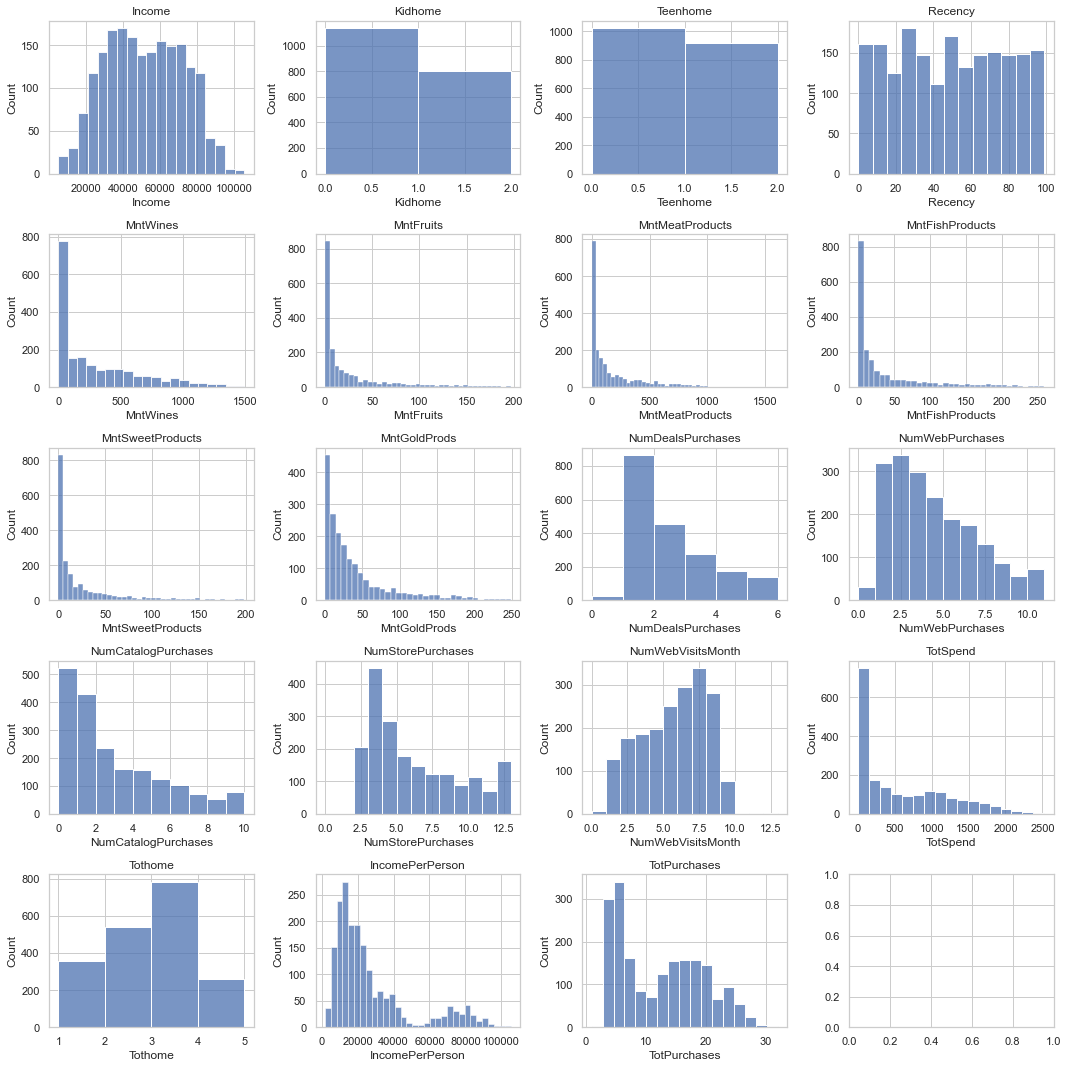

In [197]:
# create subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Defining features for histplot to use binwidth = 1 for better readability of histograms
low_range_columns = ['Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'Tothome']

# add histograms for each column
for i, col_name in enumerate(num_cols):
    if col_name in low_range_columns:
        binwidth = 1
    else:
        binwidth = None
    row = i // 4
    col = i % 4
    sns.histplot(data=data_filtered, x=col_name, ax=axs[row, col], binwidth=binwidth)
    axs[row, col].set_title(col_name)
    

# adjust subplot spacing
fig.tight_layout()

# show the plot
plt.show()

**Observations:**
- The `Income` column is normally distributed, with a slight dip around the mean.
- Most customers have no kids or teenagers at home.
- The last visit of the customers, as seen in the `Recency` column, has a fairly uniform distribution. 
- All of the columns that refer to amount spent on a specific category have a heavy skew to the right.
- The columns that refer to where the purchase was made, also skew heavily to the right.
- Customers clearly visit the shop website with more frequency than the number of times they purchase items from the website.
- The `Tothome` column shows that most people have 3 people in their household.
- The `IncomePerPerson` column has some interesting distribution that appears to have almost 2 normal distributions combined. Presumably, the higher value peak  is due to the customer having less people in the household.

### 2.1.2 Boolean Data

This data is comprised of columns which refer to whether a customer took part in a promotion or not and whether a customer has complained in the last 2 years.

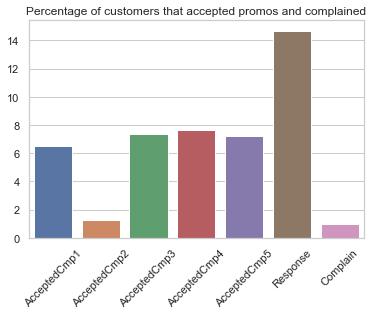

In [198]:
bool_means = data_filtered[bool_cols].mean() * 100

sns.barplot(x=bool_means.index, y= bool_means)
plt.title('Percentage of customers that accepted promos and complained')
plt.xticks(rotation=45)

plt.show()

**Observations:**
- Can see that the most recent compaign (represented by 'Response') was very popular and around double the percentage of customers signed up compared to most previous compaigns.
- The second campaign was by far the least successful campaign, with less than 2 percent of customers signing up.
- A very small percentage (around 1 percent) of customers complained in the last 2 years.

I also want to see of the frequency distribution for how many promos customers have accepted. This way we can see if there are repeat customers that are more likely to sign onto promos in the future.

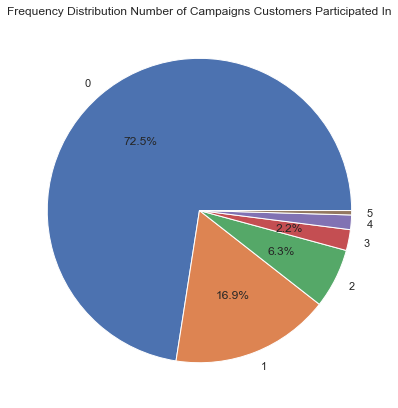

In [199]:
# Creating new column for total number of campaigns a customer participated in
data_filtered['TotCmp'] = data_filtered[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Response']].sum(axis=1)

# Creating a frequency table for the total number of compaigns a customer participated in
TotCmp_freq = data_filtered['TotCmp'].value_counts()

# Defining the size of the pie chart
fig = plt.figure(figsize=(7,7))

# Creating pie chart from the frequency distribution
plt.pie(TotCmp_freq, labels=TotCmp_freq.index, autopct=lambda pct: f"{pct:.1f}%" if pct >= 2 else '')
plt.title('Frequency Distribution Number of Campaigns Customers Participated In')
plt.show()

**Observations:**
- 72.5% of customers never took part in a campaign.
- around 10% of customers took part in 2 or more campaigns. These customers may be more likely to take part in a campaign in the future.

### 2.1.3 Date Data

In this section we will look at the date data.

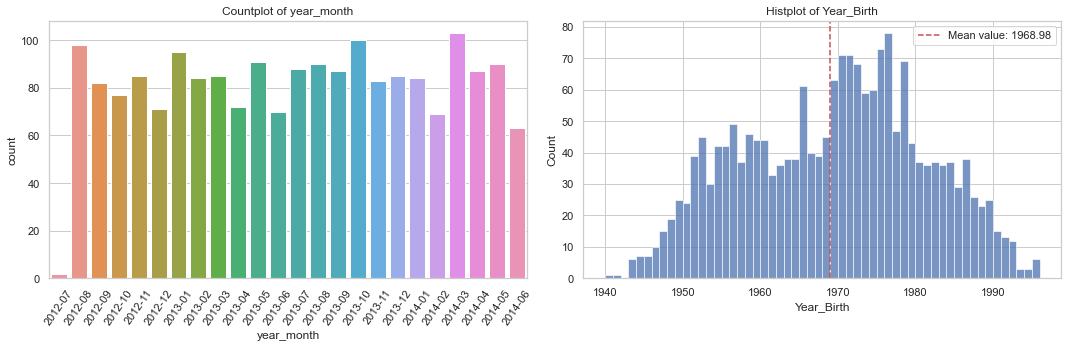

In [200]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

data_filtered['year_month'] = data_filtered['Dt_Customer'].dt.strftime('%Y-%m')

# Plot the countplot on the first subplot
sns.countplot(data=data_filtered, x='year_month', order=data_filtered['year_month'].sort_values().unique(), ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=55)
axs[0].set_title('Countplot of year_month')


# Plot the histplot on the second subplot
sns.histplot(data=data_filtered, x='Year_Birth', ax=axs[1], binwidth=1)
axs[1].set_title('Histplot of Year_Birth')

# Calculate the mean value
mean_value = data_filtered['Year_Birth'].mean()

# Add a vertical line for the mean value
axs[1].axvline(mean_value, color='r', linestyle='--', label=f'Mean value: {mean_value:.2f}')
axs[1].legend()

# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()

**Observations:**
- We can see that the month that customers enrolled with the company is reasonably evenly distributed.
- The year of birth for the customers is normally distributed. The most frequent birth years are in the 70s.

## 2.2 Bivariate Analysis

### 2.2.1 Heatmap

Starting with a heatmap we can see generally how some variables are linearly correlated to others. We can then explore interesting relationships further.

In the heatmap below, some columns have been removed for conciseness and 'Tot' or total columns have been used to sum data such as the amount spend on different product categories, the number of campaigns a customer participated in and the total number of purchases a customer made.

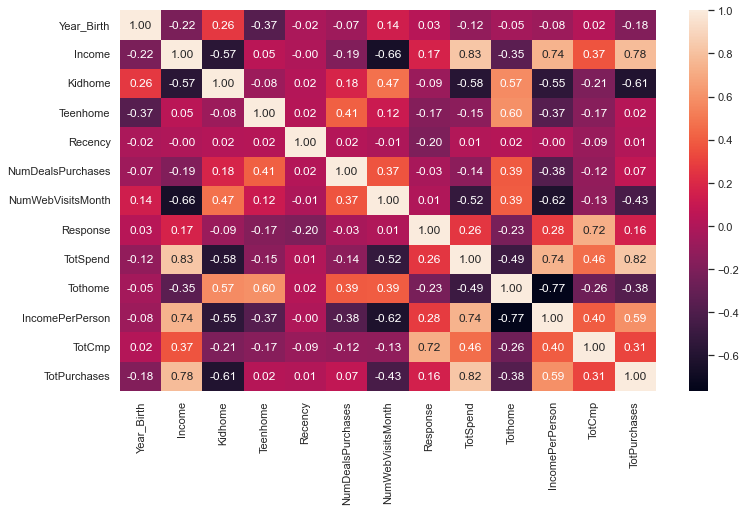

In [201]:
# Selecting relevant columns for the heatmap
heatmap_cols = ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth',
       'Response', 'TotSpend', 'Tothome',
       'IncomePerPerson', 'TotCmp','TotPurchases']

plt.figure(figsize=(12,7))
correlations = data_filtered[heatmap_cols].corr()
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.show()

**Observations:**

- `Income` is highly positively correlated (0.83) with `TotSpend`.
- People who responded to the last campaign had a high positive correlation (0.72) with the total number of campaigns responded to.
- `TotSpend` is highly positively correlated (0.82) with `IncomePerPerson`.
- `Kidhome` is negatively correlated (-0.58) with `TotSpend`.
- `Kidhome` is positively correlated (0.47) with `NumWebVisitsMonth`, indicating that customers with kids may be more likely to do their shopping online.
- `NumWebVisitsMonth` is negatively correlated with `TotSpend`. This is an interesting observation, as it suggests that the more someone visits the website, the less they are likely to spend. Perhaps these individuals are more cautious about spending their money.
- `TotSpend` is negatively correlated (-0.49) with `Tothome` and positively correlated (0.46) with `TotCmp`.




### 2.2.2 Scatter Plots
Let's create some scatter plots to investigate some of these relationships further. Namely we are intested in things that correlate with `TotSpend`.

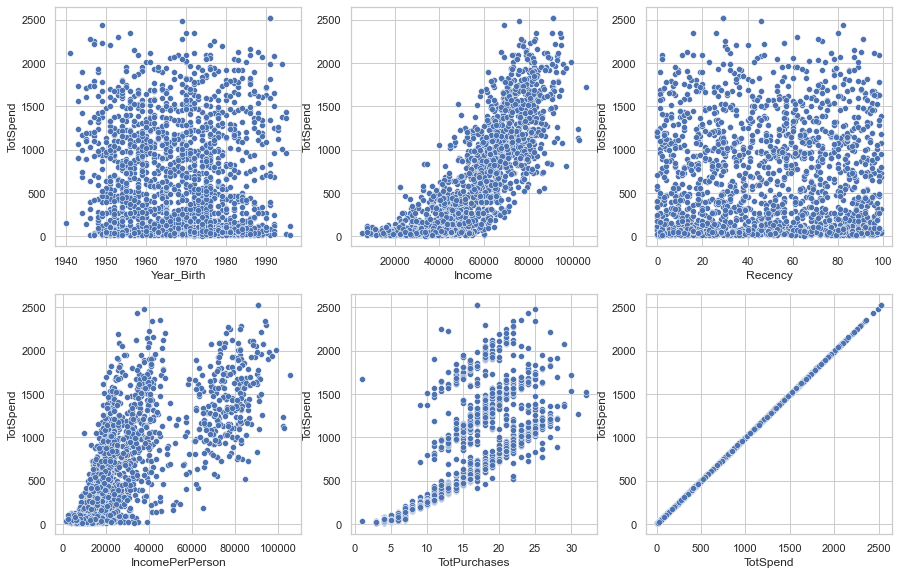

In [202]:
scatter_cols = ['Year_Birth', 'Income', 'Recency',
       'IncomePerPerson','TotPurchases', 'TotSpend']

fig = plt.figure(figsize=(15,15))

for i, col in enumerate(scatter_cols):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=data_filtered, y='TotSpend', x=col)

Observations:

- There appears to be no discernible relationship between `Year_Birth` or `Recency` and `TotSpend`.
- A positive correlation exists between `Income` and `TotSpend`, which may be non-linear in nature.
- The `IncomePerPerson` plot seems to reveal two distinct groups, possibly representing customers who live alone and those who do not. Notably, customers with fewer dependents tend to spend more.
- The relationship between `TotPurchases` and `TotSpend` displays three distinct groups, with a general trend indicating that higher total purchases correspond to higher total spending. These groups could be a result of customers spending varying amounts based on their preferred sales channels (online, catalog, or in-store). Further investigation is warranted to explore this possibility.

## 2.3 Key Insights and Observations from EDA

In this section, we performed an extensive Exploratory Data Analysis (EDA) to gain a deeper understanding of the dataset and its features. The EDA was broken down into univariate EDA and bivariate EDA.

Key observations related to the project goals are as follows:

1. Numerical Data:
    - The Income column showed a normal distribution with a slight dip around the mean.
    - Most customers had no kids or teenagers at home.
    - All columns referring to the amount spent on a specific category and the number of purchases made across different channels were heavily right-skewed
    
    
2. Boolean Data:
    - The most recent campaign (represented by 'Response') had the highest percentage of customer sign-ups compared to previous campaigns.
    - Around 10% of customers participated in two or more campaigns, indicating potential repeat customers for future promotions.
    
    
3. Date Data:
    - The month customers enrolled with the company was reasonably evenly distributed.
    - The year of birth for customers was normally distributed, with the most frequent birth years in the 1970s.
    
    
4. Bivariate Analysis:
    - Income was highly positively correlated with total spending.
    - People who responded to the last campaign had a high positive correlation with the total number of campaigns

# 3. Identifying Customer Segments

In this section, we will examine different customer segments and analyse their purchasing behavior. Our primary focus is on how different customer segments exhibit varying total spending patterns. We will segment customers based on the following characteristics:

- Income: We will create distinct income categories to compare customers.
- Preferred sales channel: Customers will be divided into groups based on their preferred sales channels, such as online, catalog, or in-store.
- Campaign participation: Customers will be grouped according to the number of campaigns they have participated in.
- Household size: Customers will be segmented based on the "Tothome" category, which represents the number of people in the household.



## 3.1 Segmenting Customers

In this subsection, we will segment customers based on income, preferred sales channel, campaign participation, and household size. We will create new columns in our dataset for the segmented information, which will be used later for analysis and visualization. Specifically, we will:

1. **Income:** Divide customers into Low, Medium, and High income groups using quantile-based binning.
2. **Preferred sales channel:** Identify whether customers made most purchases online, through catalogs, or in-store.
3. **Campaign participation:** Group customers with 0 campaign participations, up to 2 campaign participations, and 3 or more campaign participations.
4. **Household size:** Segment customers based on the "Tothome" category, representing the total number of people in the household, and assign them to groups: 1 person, 2-3 people, and 3+ people.

After segmentation, we will analyze the relationship between each segment and total spending to gain insights into the purchasing behavior of each customer group.



In [203]:
# Segment customers by income
income_labels = ['Low', 'Medium', 'High']
data_filtered['Income_group'] = pd.qcut(data_filtered['Income'], q=3, labels=income_labels)

# Segment customers by preferred sales channel
def sales_channel(row):
    max_channel = max(row['NumWebPurchases'], row['NumCatalogPurchases'], row['NumStorePurchases'])
    if max_channel == row['NumWebPurchases']:
        return 'Online'
    elif max_channel == row['NumCatalogPurchases']:
        return 'Catalog'
    else:
        return 'In-store'

data_filtered['Sales_channel'] = data_filtered.apply(sales_channel, axis=1)

# Segment customers by campaign participation

def participation_group(campaigns):
    if campaigns == 0:
        return '0 campaigns'
    elif campaigns <= 2:
        return '1-2 campaigns'
    else:
        return '3+ campaigns'

data_filtered['Participation_group'] = data_filtered['TotCmp'].apply(participation_group)

# Segment customers by household size

def household_group(size):
    if size == 1:
        return '1 person'
    elif size <= 3:
        return '2-3 people'
    else:
        return '3+ people'

data_filtered['Household_group'] = data_filtered['Tothome'].apply(household_group)


## 3.2 Analysing Customer Segments Relationship to Total Spend

We will now investigate the relationship between customer segments and total spending. Box plots and summary statistics will be used to examine the distribution of total spending among the segments we created in section 3.1.

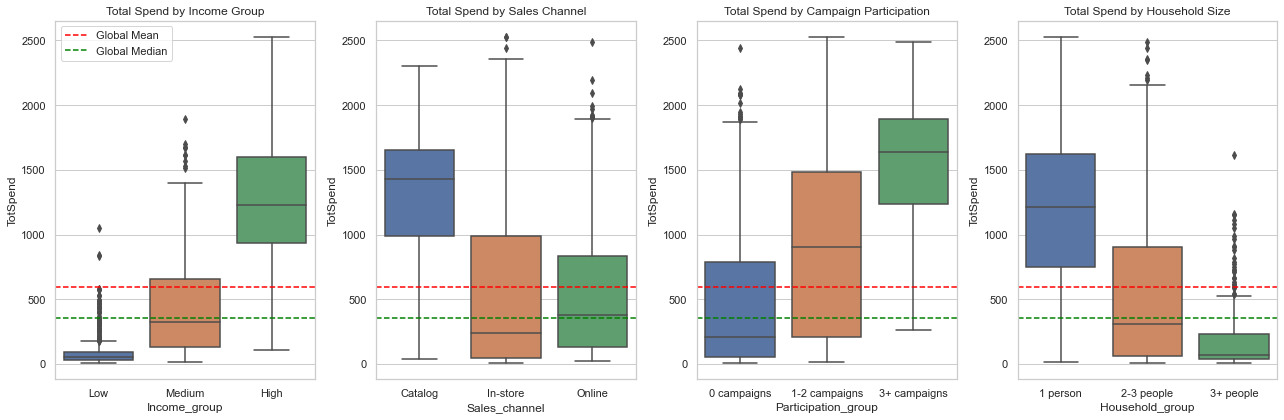

In [204]:
# Calculate global mean and median of TotSpend
global_mean = data_filtered['TotSpend'].mean()
global_median = data_filtered['TotSpend'].median()

# Draw box plots
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
sns.set(style='whitegrid')

sns.boxplot(x='Income_group', y='TotSpend', data=data_filtered, ax=axs[0])
axs[0].set_title('Total Spend by Income Group')
axs[0].axhline(global_mean, color='red', linestyle='--', label='Global Mean')
axs[0].axhline(global_median, color='green', linestyle='--', label='Global Median')
axs[0].legend()

sns.boxplot(x='Sales_channel', y='TotSpend', data=data_filtered, ax=axs[1])
axs[1].set_title('Total Spend by Sales Channel')
axs[1].axhline(global_mean, color='red', linestyle='--', label='Global Mean')
axs[1].axhline(global_median, color='green', linestyle='--', label='Global Median')

sns.boxplot(x='Participation_group', y='TotSpend', data=data_filtered, ax=axs[2], order=['0 campaigns', '1-2 campaigns', '3+ campaigns'])
axs[2].set_title('Total Spend by Campaign Participation')
axs[2].axhline(global_mean, color='red', linestyle='--', label='Global Mean')
axs[2].axhline(global_median, color='green', linestyle='--', label='Global Median')

sns.boxplot(x='Household_group', y='TotSpend', data=data_filtered, ax=axs[3])
axs[3].set_title('Total Spend by Household Size')
axs[3].axhline(global_mean, color='red', linestyle='--', label='Global Mean')
axs[3].axhline(global_median, color='green', linestyle='--', label='Global Median')

plt.tight_layout()
plt.show()



In [205]:
# Calculate global mean and median of TotSpend
global_mean = data_filtered['TotSpend'].mean()
global_median = data_filtered['TotSpend'].median()

# Group by income group and calculate statistics
income_summary = data_filtered.groupby('Income_group')['TotSpend'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
income_summary.loc['Global'] = [len(data_filtered), global_mean, global_median, data_filtered['TotSpend'].std(), data_filtered['TotSpend'].min(), data_filtered['TotSpend'].max()]
print('Income group summary:')
print(income_summary)

# Group by sales channel and calculate statistics
sales_summary = data_filtered.groupby('Sales_channel')['TotSpend'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
sales_summary.loc['Global'] = [len(data_filtered), global_mean, global_median, data_filtered['TotSpend'].std(), data_filtered['TotSpend'].min(), data_filtered['TotSpend'].max()]
print('\nSales channel summary:')
print(sales_summary)

# Group by campaign participation and calculate statistics
participation_summary = data_filtered.groupby('Participation_group')['TotSpend'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
participation_summary.loc['Global'] = [len(data_filtered), global_mean, global_median, data_filtered['TotSpend'].std(), data_filtered['TotSpend'].min(), data_filtered['TotSpend'].max()]
print('\nCampaign participation summary:')
print(participation_summary)

# Group by household size and calculate statistics
household_summary = data_filtered.groupby('Household_group')['TotSpend'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
household_summary.loc['Global'] = [len(data_filtered), global_mean, global_median, data_filtered['TotSpend'].std(), data_filtered['TotSpend'].min(), data_filtered['TotSpend'].max()]
print('\nHousehold size summary:')
print(household_summary)


Income group summary:
               count         mean  median         std    min     max
Income_group                                                        
Low            648.0    89.493827    55.0  110.886800    8.0  1052.0
Medium         646.0   431.947368   328.0  367.356161   13.0  1895.0
High           647.0  1268.230294  1230.0  465.296015  108.0  2525.0
Global        1941.0   596.380732   358.0  605.329442    8.0  2525.0

Sales channel summary:
                count         mean  median         std   min     max
Sales_channel                                                       
Catalog         119.0  1305.798319  1429.0  520.541074  41.0  2302.0
In-store       1309.0   550.289534   236.0  608.490755   8.0  2525.0
Online          513.0   549.426901   380.0  505.411473  26.0  2486.0
Global         1941.0   596.380732   358.0  605.329442   8.0  2525.0

Campaign participation summary:
                      count         mean  median         std    min     max
Participation_gro

**Observations:**
- Customers in the high income group have the highest average total spending, while customers in the low income group have the lowest average total spending. The standard deviation is highest for the high income group.
- Customers who prefer the catalog sales channel have the highest average total spending, while customers who prefer the in-store channel have the lowest average total spending. The standard deviation is highest for the catalog sales channel group.
- Customers who participated in 3 or more campaigns have the highest average total spending, while customers who participated in 0 campaigns have the lowest average total spending. The standard deviation is highest for the 1-2 campaigns group.
- Customers in households with 1 person have the highest average total spending, while customers in households with 3 or more people have the lowest average total spending. The standard deviation is highest for the 2-3 people group.



## 3.3 Analyzing Customer Segments' Relationship to Product Categories

In this section, we will examine the relationship between customer segments and their spending on product categories. By understanding how different customer segments distribute their spending across product categories, we can tailor our marketing campaigns and product offerings to better appeal to these segments. We will use the Mnt (monetary) columns for each product category to determine how much each customer has spent on each category.

We will segment the customers using the same four categories we created earlier: income group, sales channel, campaign participation, and household size. For each segment, we will calculate the mean spending on each product category and compare the results across segments. We will use stacked bar charts to visualize the results.

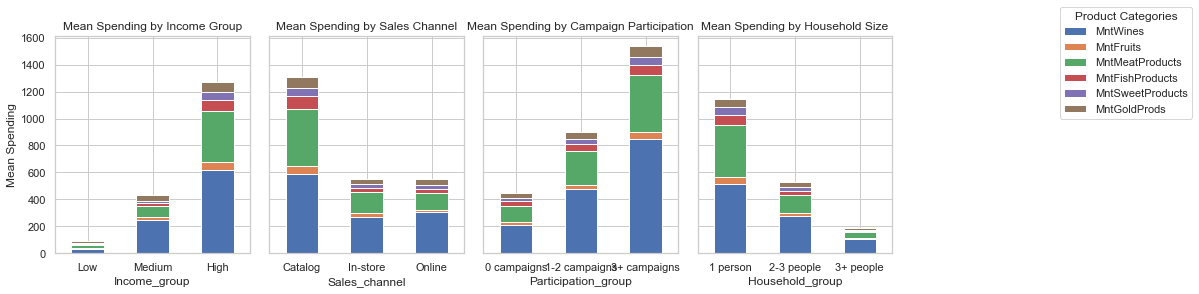

In [206]:
# Group the data by the segments
income_group = data_filtered.groupby('Income_group')
sales_channel = data_filtered.groupby('Sales_channel')
campaign_participation = data_filtered.groupby('Participation_group')
household_size = data_filtered.groupby('Household_group')

# Calculate the mean spending for each product category within each segment
mean_income_group = income_group[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
mean_sales_channel = sales_channel[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
mean_campaign_participation = campaign_participation[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
mean_household_size = household_size[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Create a function to plot the stacked bar charts in a single row
def plot_stacked_bar_subplot(ax, df, title):
    df.plot.bar(stacked=True, ax=ax, legend=False)
    ax.set_title(title)
    ax.set_ylabel('Mean Spending')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4), sharey=True)
fig.subplots_adjust(wspace=0.1)

# Plot the stacked bar charts for each segment on the subplots
plot_stacked_bar_subplot(axes[0], mean_income_group, 'Mean Spending by Income Group')
plot_stacked_bar_subplot(axes[1], mean_sales_channel, 'Mean Spending by Sales Channel')
plot_stacked_bar_subplot(axes[2], mean_campaign_participation, 'Mean Spending by Campaign Participation')
plot_stacked_bar_subplot(axes[3], mean_household_size, 'Mean Spending by Household Size')

# Add a single legend for all graphs
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [207]:
# Function to display data in tabular format
def display_data_table(df, title):
    print(f"{title}:")
    display(df)
    print("\n")

# Display data tables for each segment
display_data_table(mean_income_group, "Mean Spending by Income Group")
display_data_table(mean_sales_channel, "Mean Spending by Sales Channel")
display_data_table(mean_campaign_participation, "Mean Spending by Campaign Participation")
display_data_table(mean_household_size, "Mean Spending by Household Size")


Mean Spending by Income Group:


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income_group,,,,,,
Low,29.421296,5.884259,22.714506,9.023148,6.120370,16.330247
Medium,249.821981,16.122291,87.097523,22.315789,15.905573,40.684211
High,618.527048,56.727975,382.421947,81.701700,59.372488,69.479134




Mean Spending by Sales Channel:


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Sales_channel,,,,,,
Catalog,587.873950,59.605042,425.521008,94.966387,56.554622,81.277311
In-store,271.547746,24.994652,155.623377,35.024446,26.174179,36.925134
Online,302.580897,21.676413,124.879142,31.142300,22.734893,46.413255




Mean Spending by Campaign Participation:


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Participation_group,,,,,,
0 campaigns,210.798295,22.485085,120.517045,32.074574,22.676136,35.659801
1-2 campaigns,474.745011,33.512195,253.086475,48.547672,35.028825,55.425721
3+ campaigns,850.280488,50.707317,421.719512,74.000000,60.109756,80.621951




Mean Spending by Household Size:


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Household_group,,,,,,
1 person,512.076056,53.814085,384.960563,77.769014,54.436620,65.276056
2-3 people,279.534340,22.711698,129.359245,32.686038,23.952453,40.906415
3+ people,109.068966,6.643678,39.651341,8.455939,6.103448,17.022989


**Observations:**

Overall, we can observe that Wines and Meats are the top two categories in terms of customer spending for all groups. Let's delve deeper into the distinct groups.

1. Mean Spending by Income Group:
   - The High-income group has the highest spending on Wines, followed by Meat Products, and the lowest spending on Gold Products.
   - The Low-income group spends the most on Wines as well, but the spending on Meat Products and Gold Products is almost equal.


2. Mean Spending by Sales Channel:
   - Catalog sales have the highest mean spending across all product categories, followed by Online and In-store sales.
   - Customers tend to spend the most on Wines regardless of the sales channel.
   - The Catalog sales channel has significantly higher mean spending on Meat and Fish Products compared to other channels.


3. Mean Spending by Campaign Participation:
   - Customers who participated in 3+ campaigns spend the most on Wines, followed by Meat Products, and the least on Gold Products.
   - There is a considerable difference in spending on Wines between customers who participated in 0 campaigns and those who participated in 1-2 campaigns, suggesting that campaigns have a strong impact on wine sales.


4. Mean Spending by Household Size:
   - One-person households have the highest mean spending across all product categories, followed by 2-3 people households, and the lowest spending is in households with 3+ people.
   - Similar to other segments, the highest mean spending is on Wines for all household sizes.
   - The difference in mean spending on Fruits, Fish Products, Sweet Products, and Gold Products is more pronounced between one-person households and households with 3+ people than between one-person households and 2-3 people households.


## 3.4 Analyzing Average Purchase Value Across Customer Segments
In this section, we will examine the average purchase value across the customer segments we created earlier: income group, sales channel, campaign participation, and household size. We will calculate the average purchase value for each segment and use summary statistics to compare the results.





In [208]:
# Calculate the average purchase value
data_filtered['AvgPurchaseValue'] = data_filtered['TotSpend'] / data_filtered['TotPurchases']

# Calculate the mean purchase value for each segment
mean_purchase_value_income = data_filtered.groupby('Income_group')['AvgPurchaseValue'].mean().reset_index()
mean_purchase_value_sales = data_filtered.groupby('Sales_channel')['AvgPurchaseValue'].mean().reset_index()
mean_purchase_value_campaign = data_filtered.groupby('Participation_group')['AvgPurchaseValue'].mean().reset_index()
mean_purchase_value_household = data_filtered.groupby('Household_group')['AvgPurchaseValue'].mean().reset_index()

# Create DataFrames
mean_purchase_value_income_df = pd.DataFrame(mean_purchase_value_income)
mean_purchase_value_sales_df = pd.DataFrame(mean_purchase_value_sales)
mean_purchase_value_campaign_df = pd.DataFrame(mean_purchase_value_campaign)
mean_purchase_value_household_df = pd.DataFrame(mean_purchase_value_household)

# Display the summary statistics
print("Mean Purchase Value by Income Group:")
display(mean_purchase_value_income_df)

print("\nMean Purchase Value by Sales Channel:")
display(mean_purchase_value_sales_df)

print("\nMean Purchase Value by Campaign Participation:")
display(mean_purchase_value_campaign_df)

print("\nMean Purchase Value by Household Size:")
display(mean_purchase_value_household_df)



Mean Purchase Value by Income Group:


,Income_group,AvgPurchaseValue
0,Low,12.941758
1,Medium,31.982692
2,High,68.506140



Mean Purchase Value by Sales Channel:


,Sales_channel,AvgPurchaseValue
0,Catalog,75.600395
1,In-store,35.148276
2,Online,35.799240



Mean Purchase Value by Campaign Participation:


,Participation_group,AvgPurchaseValue
0,0 campaigns,29.451029
1,1-2 campaigns,55.768113
2,3+ campaigns,82.342471



Mean Purchase Value by Household Size:


,Household_group,AvgPurchaseValue
0,1 person,69.008006
1,2-3 people,33.427399
2,3+ people,17.553273


**Observations:**

1. Mean Purchase Value by Income Group:
    - Customers in the High-income group have the highest mean purchase value per order, almost double that of the Medium-income group, and five times higher than that of the Low-income group.
    - Customers in the Low-income group have the lowest mean purchase value per order.


2. Mean Purchase Value by Sales Channel:
    - Catalog sales have the highest mean purchase value per order, more than double that of In-store and Online sales.
    - Customers who purchase through In-store and Online channels have similar mean purchase values per order.

3. Mean Purchase Value by Campaign Participation:
    - Customers who participated in 3+ campaigns have the highest mean purchase value per order, followed by those who participated in 1-2 campaigns, and those who did not participate in any campaign have the lowest mean purchase value per order.

4. Mean Purchase Value by Household Size:
    - One-person households have the highest mean purchase value per order, followed by 2-3 people households, and households with 3+ people have the lowest mean purchase value per order.
    - The mean purchase value per order is almost twice as high for one-person households compared to households with 3+ people.

## 3.5 Analyzing Response Rates to Campaigns Across Customer Segments
In this section, we will explore the response rates to campaigns for different customer segments. We will use the `TotCmp` column to determine the total number of campaigns a customer has joined. We will calculate the mean response rate for each customer segment and compare the results using summary statistics.

In [209]:
# Calculate the total number of customers in each segment
customer_count_income = data_filtered.groupby('Income_group')['Dt_Customer'].count()
customer_count_sales = data_filtered.groupby('Sales_channel')['Dt_Customer'].count()
customer_count_campaign = data_filtered.groupby('Participation_group')['Dt_Customer'].count()
customer_count_household = data_filtered.groupby('Household_group')['Dt_Customer'].count()

# Calculate the mean response rate for each segment
mean_response_rate_income = data_filtered.groupby('Income_group')['TotCmp'].sum() / customer_count_income
mean_response_rate_sales = data_filtered.groupby('Sales_channel')['TotCmp'].sum() / customer_count_sales
mean_response_rate_household = data_filtered.groupby('Household_group')['TotCmp'].sum() / customer_count_household

# Create DataFrames
mean_response_rate_income_df = pd.DataFrame(mean_response_rate_income)
mean_response_rate_sales_df = pd.DataFrame(mean_response_rate_sales)
mean_response_rate_household_df = pd.DataFrame(mean_response_rate_household)

# Display the summary statistics
print("Mean Response Rate by Income Group:")
display(mean_response_rate_income_df)

print("\nMean Response Rate by Sales Channel:")
display(mean_response_rate_sales_df)

print("\nMean Response Rate by Household Size:")
display(mean_response_rate_household_df)


Mean Response Rate by Income Group:


,0
Income_group,
Low,0.211420
Medium,0.272446
High,0.857805



Mean Response Rate by Sales Channel:


,0
Sales_channel,
Catalog,1.025210
In-store,0.367456
Online,0.516569



Mean Response Rate by Household Size:


,0
Household_group,
1 person,0.929577
2-3 people,0.369057
3+ people,0.187739


**Observations:**
- The high-income group has a significantly higher response rate to campaigns compared to the low and medium-income groups. Therefore, it may be more effective to target high-income customers with more expensive and exclusive products to generate more sales.
- Catalog sales channel has the highest mean response rate, followed by online and in-store sales. Therefore, businesses may consider investing more in catalog sales to reach more customers and generate more sales.
- One-person households have a much higher response rate to campaigns compared to households with two or more people. Therefore, businesses may consider offering products and services that cater to the needs of single individuals, such as smaller and more affordable packages, and personalized experiences.

Overall, the analysis suggests that the business should tailor their marketing campaigns and products to meet the needs and preferences of specific customer segments, such as high-income customers, catalog sales channel, and one-person households. By doing so, businesses can increase their sales and revenue while better satisfying their customers' needs.

## 3.6 Summary and Insights from Customer Segments Analysis

In this section, we examined customer segments based on income, preferred sales channel, campaign participation, and household size. We analyzed these segments to understand their purchasing behavior and how they relate to total spending, spending across product categories, average purchase value, and response rates to campaigns. The primary goal was to identify patterns and insights that can be used to tailor marketing campaigns and product offerings for each segment.

Summary of Analysis:

1. Customers in the high-income group exhibited the highest average total spending and mean purchase value per order. They also showed the highest response rate to campaigns.
2. The catalog sales channel had the highest average total spending and mean purchase value per order. Customers who preferred this channel also showed the highest response rate to campaigns.
3. Customers who participated in more campaigns had higher average total spending and mean purchase value per order.
4. One-person households had the highest average total spending and mean purchase value per order. They also showed the highest response rate to campaigns.


Insights and Recommendations:

1. Focus on high-income customers by offering them more expensive and exclusive products to increase sales and revenue.
2. Invest more in the catalog sales channel to reach more customers and generate more sales, as customers who prefer this channel have the highest spending and response rates.
3. Encourage customer participation in campaigns, as increased participation leads to higher total spending and mean purchase value per order.
4. Offer products and services catering to one-person households, such as smaller and more affordable packages or personalized experiences, as these customers have the highest spending and response rates to campaigns.

Overall, by tailoring marketing campaigns and product offerings to meet the needs and preferences of specific customer segments, the business can increase it's sales and revenue while better satisfying it's customers' needs.

## Section 4: Project Conclusion

Throughout this project, we aimed to identify customer segments, determine key customer characteristics that impact purchasing behavior, and provide actionable insights and recommendations for targeting specific customer segments and improving overall sales and revenue.

In the process of achieving these goals, we conducted data cleaning, exploratory data analysis (EDA), and customer segmentation analysis. Key findings from these sections include:

1. High-income customers exhibit the highest average total spending, mean purchase value per order, and response rate to campaigns. This suggests that focusing on high-income customers and offering them exclusive and expensive products could lead to increased sales and revenue.
2. The catalog sales channel showed the highest average total spending and mean purchase value per order. Customers who preferred this channel also had the highest response rate to campaigns. Investing more in the catalog sales channel could help reach more customers and generate more sales.
3. Customers who participated in more campaigns had higher average total spending and mean purchase value per order. Encouraging customer participation in campaigns can lead to higher spending and purchase values.
4. One-person households displayed the highest average total spending, mean purchase value per order, and response rate to campaigns. Offering products and services catering to one-person households, such as smaller and more affordable packages or personalized experiences, can drive higher sales and customer satisfaction.

In conclusion, this project successfully identified key customer segments and characteristics that significantly impact purchasing behavior. The insights and recommendations provided can help the company tailor its marketing campaigns and product offerings to meet the needs and preferences of specific customer segments. By implementing these strategies, the business can increase sales and revenue while enhancing customer satisfaction.